# **Data acquisition: Import Data from [UCI](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)**

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  **Data Overview**

In [4]:
X.shape, y.shape

((253680, 21), (253680, 1))

In [5]:
X.columns, y.columns

(Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
        'Income'],
       dtype='object'),
 Index(['Diabetes_binary'], dtype='object'))

## **Features and Target Variable Explanation**

**Diabetes_binary**: 0 = no diabetes 1 = prediabetes or diabetes

**HighBP**: 0 = no high BP 1 = high BP

**HighChol**: 0 = no high cholesterol 1 = high cholesterol

**CholCheck**: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

**BMI**: Body Mass Index

**Smoker**: Have you smoked at least 100 cigarettes in your entire life?: 0 = no 1 = yes

**Stroke**: (Ever told) you had a stroke. 0 = no 1 = yes

**HeartDiseaseorAttack**: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

**PhyActivity**: physical activity in past 30 days - not including job 0 = no 1 = yes

**Fruits**: Consume Fruit 1 or more times per day 0 = no 1 = yes

**Veggies**: Consume Vegetables 1 or more times per day 0 = no 1 = yes

**HvyAlcoholConsump**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

**AnyHealthcare**: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

**NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

**GenHlth**: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

**MentHlth**: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

**PhysHlth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

**DiffWalk**: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

**Sex**: 0 = female 1 = male

**Age**: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

**Education**: 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

**Income**: scale 1-8 : 1 = less than 10,000, 5 = less than 35,000, 8 = 75,000 or more


In [6]:
df1 = X.copy()
df1['Diabetes_binary'] = y
df1.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


## **Selecting 5000 random samples from df1 with random_state = 66 and with replacement**

* With replacement -> Independent, identically distributed sample





In [7]:
df = df1.sample(n = 5000, random_state = 66, replace = True)

## **Data Cleaning**

In [8]:
df.isnull().sum()
# No null value

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 222228 to 176556
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                5000 non-null   int64
 1   HighChol              5000 non-null   int64
 2   CholCheck             5000 non-null   int64
 3   BMI                   5000 non-null   int64
 4   Smoker                5000 non-null   int64
 5   Stroke                5000 non-null   int64
 6   HeartDiseaseorAttack  5000 non-null   int64
 7   PhysActivity          5000 non-null   int64
 8   Fruits                5000 non-null   int64
 9   Veggies               5000 non-null   int64
 10  HvyAlcoholConsump     5000 non-null   int64
 11  AnyHealthcare         5000 non-null   int64
 12  NoDocbcCost           5000 non-null   int64
 13  GenHlth               5000 non-null   int64
 14  MentHlth              5000 non-null   int64
 15  PhysHlth              5000 non-null   int64
 16 

In [10]:
cat_col = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth','DiffWalk', 'Sex', 'Age', 'Education', 'Income']

In [11]:
num_col = ['BMI']

In [12]:
#target = ['Diabetes_binary']

In [13]:
df[cat_col] = df[cat_col].astype('category')

## **Visualizing the Distribution of Each Categorical Feature**

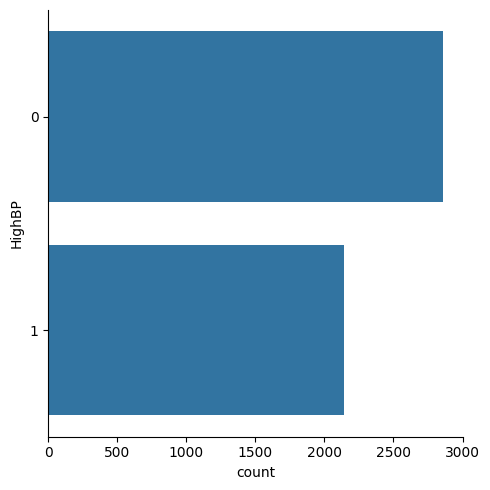

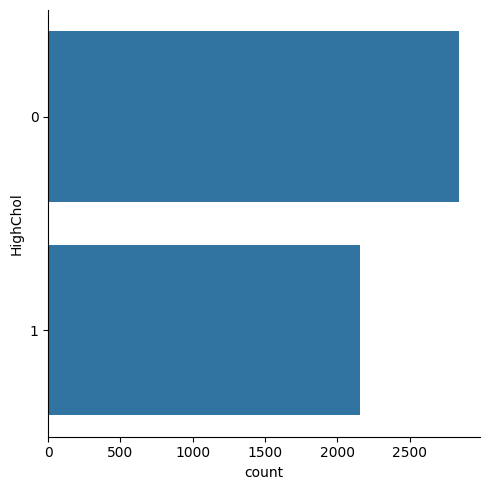

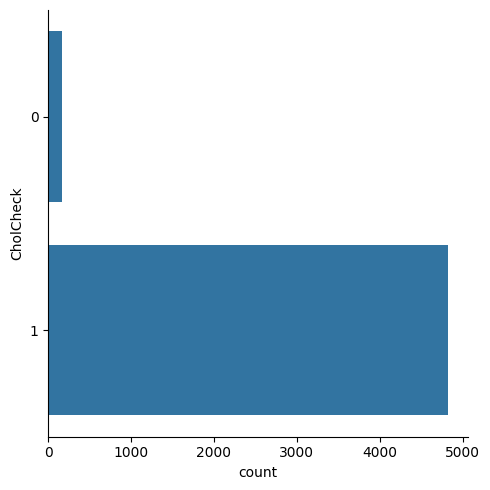

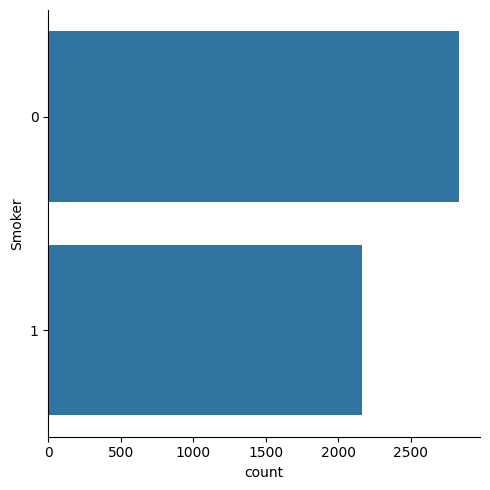

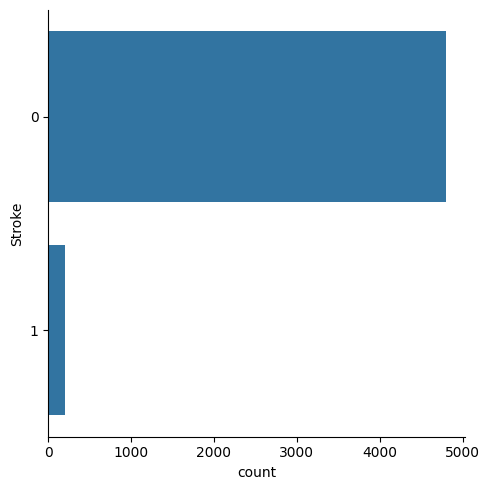

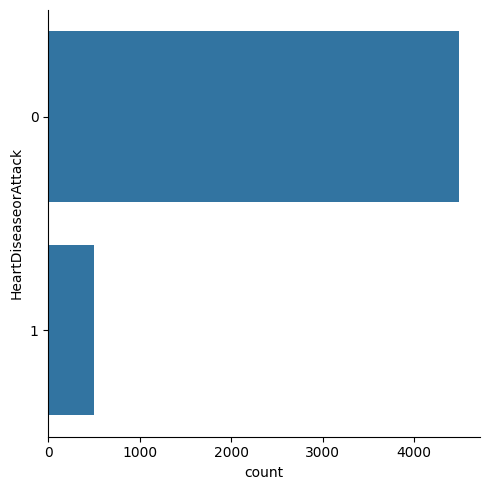

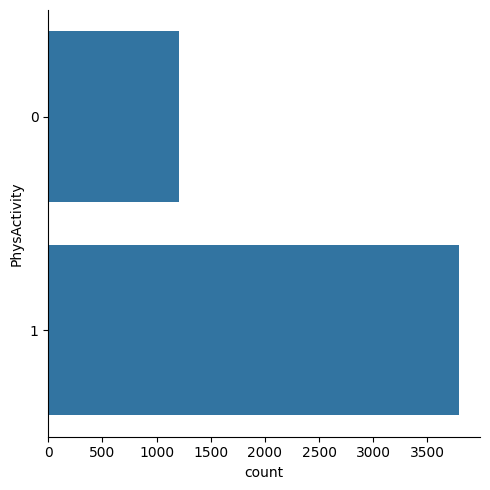

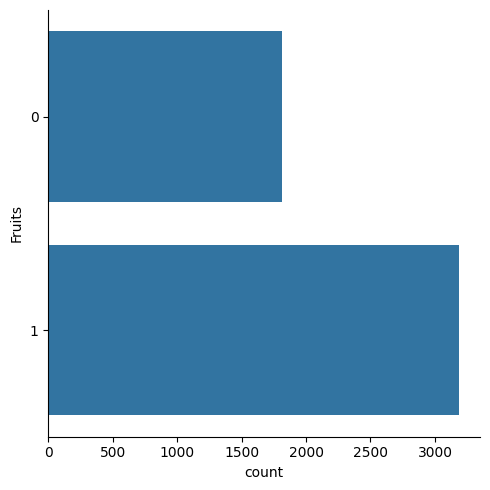

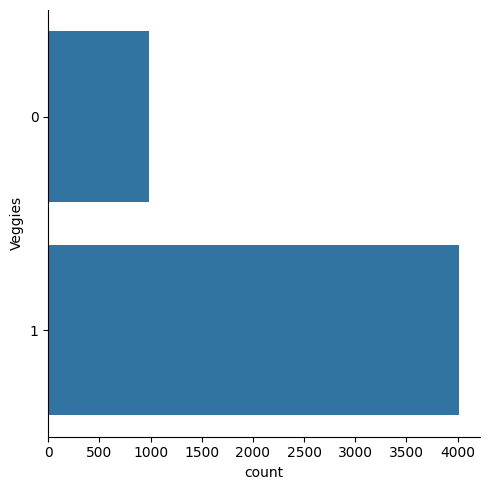

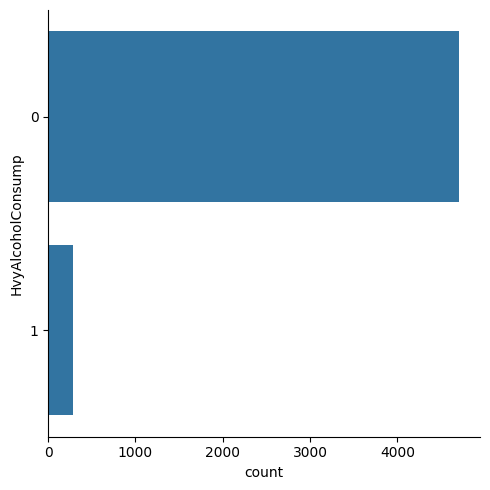

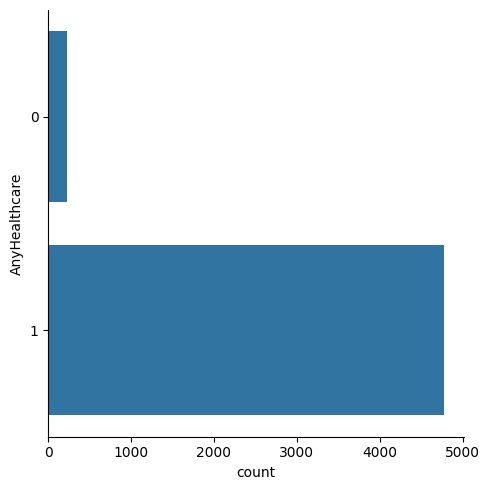

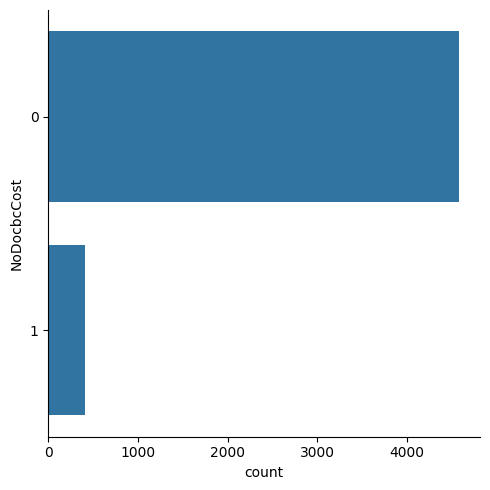

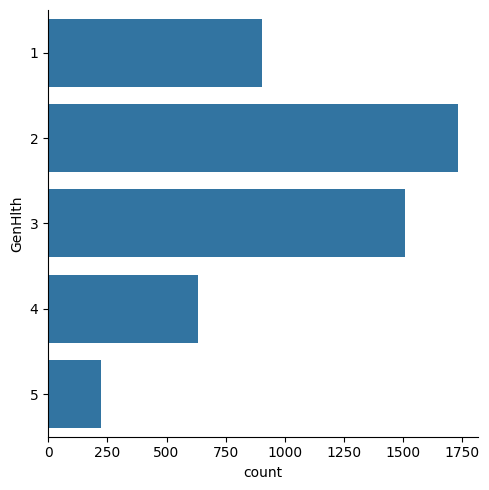

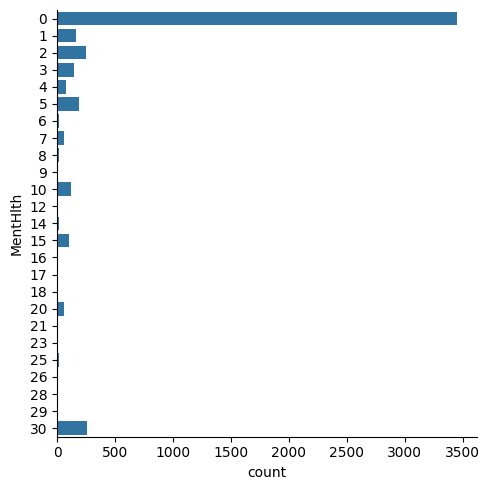

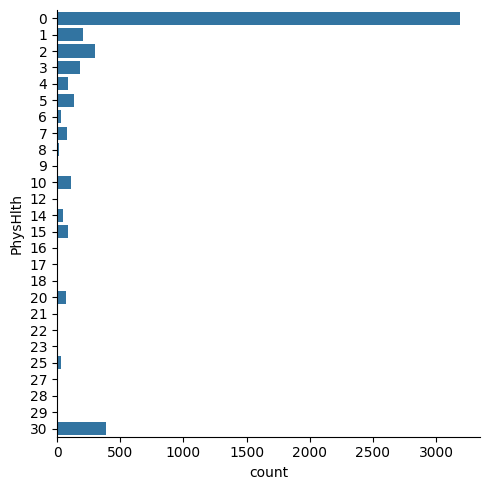

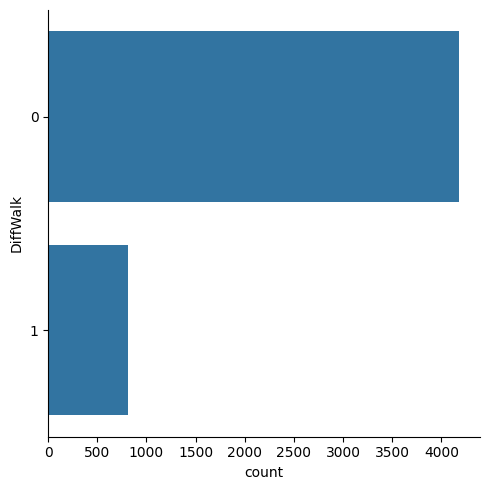

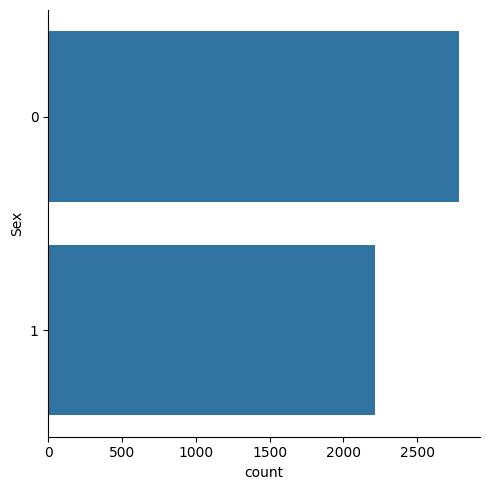

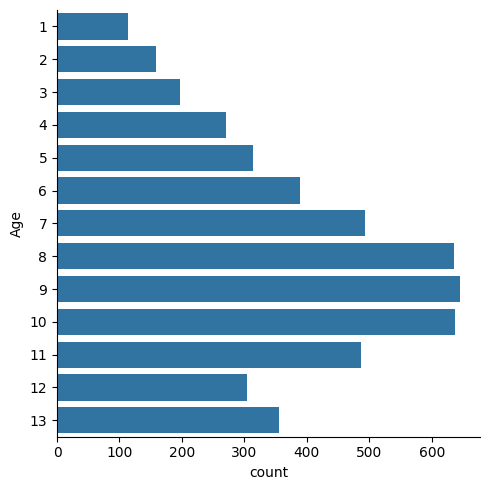

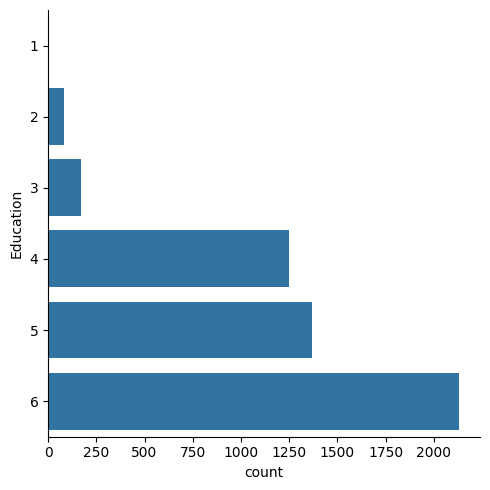

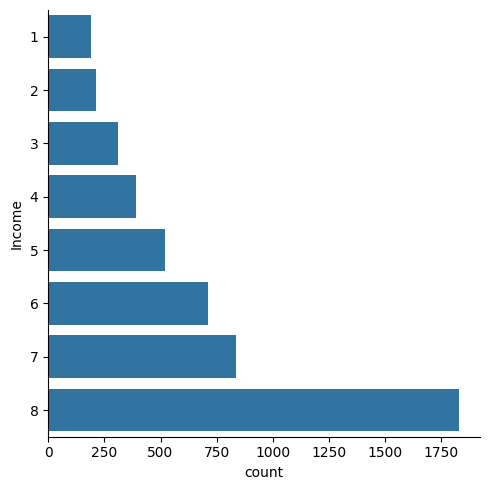

In [14]:
for i in cat_col:
  sns.catplot(df[i], kind="count")

  plt.tight_layout()
  plt.show()


* **MentHlth and PhysHlth**: Further separate into bins to make the count plots smoother
* **Education**: Remove samples with Education level = 1 due to limited number

In [15]:
df[['MentHlth','PhysHlth']] = df[['MentHlth','PhysHlth']].astype('int')

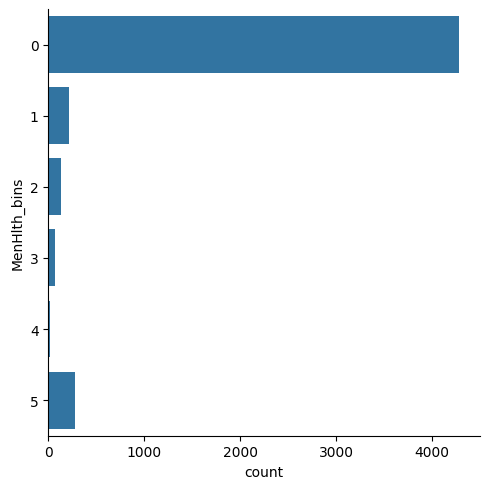

In [16]:
df['MenHlth_bins'] = pd.cut(df['MentHlth'], bins = [-0.0001, 5, 10, 15, 20, 25, 30], labels=[0,1,2,3,4,5])
sns.catplot(df['MenHlth_bins'], kind="count")

#Unit: Days
#0: (0,5]
#1: (5,10]
#2: (10,15]
#3: (15, 20]
#4: (20, 25]
#5: (25, 30]

In [17]:
df['MenHlth_bins'].astype('category').value_counts().sort_index()

0    4288
1     216
2     132
3      67
4      21
5     276
Name: MenHlth_bins, dtype: int64

**PhysHlth**

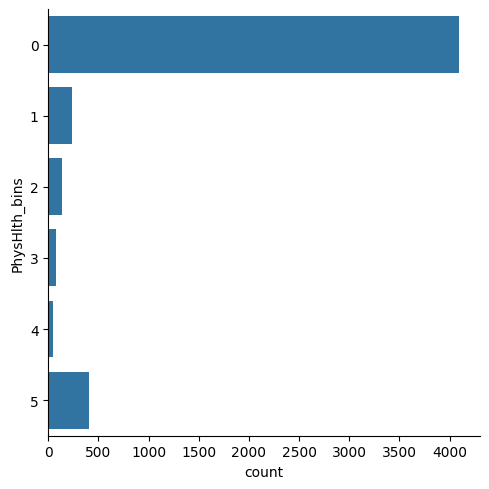

In [18]:
df['PhysHlth_bins'] = pd.cut(df['PhysHlth'], bins = [-0.0001, 5, 10, 15, 20, 25, 30], labels=[0,1,2,3,4,5])
sns.catplot(df['PhysHlth_bins'], kind="count")

#Unit = Days
#0: (0,5]
#1: (5,10]
#2: (10,15]
#3: (15, 20]
#4: (20, 25]
#5: (25, 30]

In [19]:
df['PhysHlth_bins'].astype('category').value_counts().sort_index()

0    4099
1     239
2     141
3      77
4      43
5     401
Name: PhysHlth_bins, dtype: int64

**Education**

In [20]:
df.drop(df[(df['Education'] == 1)].index, inplace=True)

In [21]:
df['Education'].value_counts().sort_index()

1       0
2      81
3     170
4    1247
5    1367
6    2133
Name: Education, dtype: int64

In [22]:
#Check datatype after adjusting MentHlth and PhyHlth
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 222228 to 176556
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   HighBP                4998 non-null   category
 1   HighChol              4998 non-null   category
 2   CholCheck             4998 non-null   category
 3   BMI                   4998 non-null   int64   
 4   Smoker                4998 non-null   category
 5   Stroke                4998 non-null   category
 6   HeartDiseaseorAttack  4998 non-null   category
 7   PhysActivity          4998 non-null   category
 8   Fruits                4998 non-null   category
 9   Veggies               4998 non-null   category
 10  HvyAlcoholConsump     4998 non-null   category
 11  AnyHealthcare         4998 non-null   category
 12  NoDocbcCost           4998 non-null   category
 13  GenHlth               4998 non-null   category
 14  MentHlth              4998 non-null   int64   
 1

## **Examining Numerical Features**

In [23]:
df[num_col].describe()

,BMI
count,4998.000000
mean,28.371549
std,6.714019
min,13.000000
25%,24.000000
50%,27.000000
75%,31.000000
max,92.000000


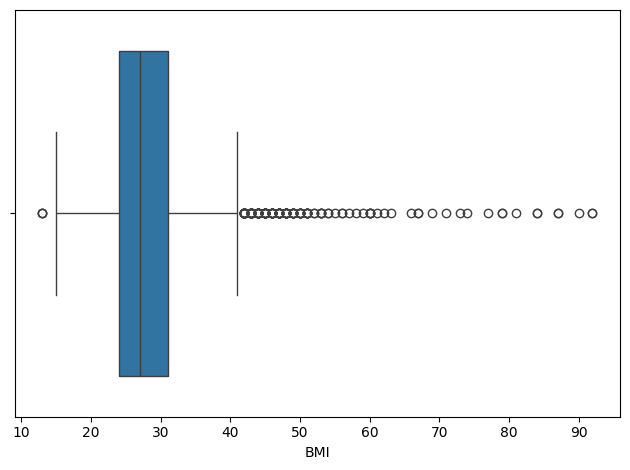

In [24]:
sns.boxplot(x=df['BMI'], orient='h')

plt.tight_layout()
plt.show()

In [25]:
#BMI IQR
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

24.0 31.0 13.5 41.5


In [26]:
#Drop patient records where  BMI > 50 or BMI <15.
df.drop(df[(df['BMI'] > 50) | (df['BMI'] < 15)].index, inplace=True)
df.shape

(4949, 24)

Text(0.5, 1.0, 'BMI Distribution')

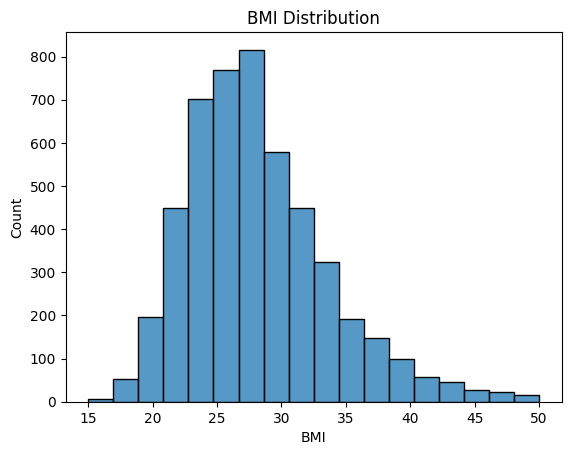

In [27]:
sns.histplot(df['BMI'], bins = 18)

plt.title("BMI Distribution")

## **Data transformation** (Numerical Feature)


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df['BMI_normalized'] = scaler.fit_transform(df[['BMI']].values)

Text(0.5, 1.0, 'BMI_normalized Distribution')

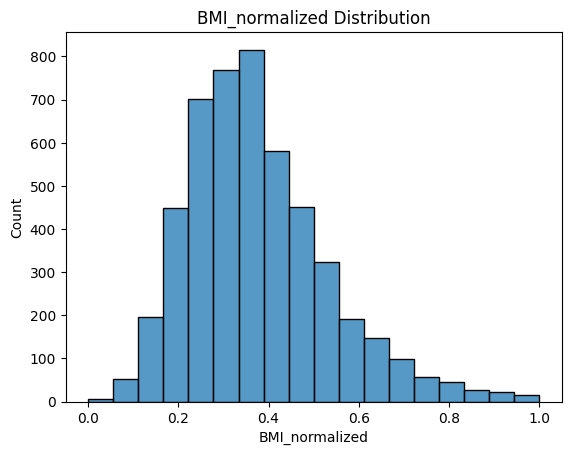

In [29]:
sns.histplot(df['BMI_normalized'], bins = 18)

plt.title("BMI_normalized Distribution")

## **About Categorical Features Transformation...**

* Since this is a relatively large dataset, encoding the nominal/ordinal categorical features would make the computing efficieny to decrease and might cause overfitting in the model. Therefore, I have kept the categorical features as the original format (Integer)

## **Cleaned Dataset**: (Name: Diabetes)

In [30]:
Diabetes = df.drop(columns=['BMI', 'MentHlth','PhysHlth'])
Diabetes.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,GenHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary,MenHlth_bins,PhysHlth_bins,BMI_normalized
222228,1,0,1,0,0,0,0,0,1,0,...,2,0,0,9,5,5,0,5,0,0.514286
123708,1,0,1,0,0,0,0,1,0,0,...,1,0,0,13,6,8,0,0,0,0.200000
139895,1,1,1,1,0,0,1,1,1,0,...,4,1,0,7,3,2,1,3,1,0.485714
139315,0,0,1,0,0,0,0,0,0,0,...,1,0,1,4,6,8,0,0,0,0.457143
62586,1,1,0,0,0,0,0,0,1,0,...,3,0,0,3,4,2,0,5,0,0.514286


In [31]:
Diabetes['Diabetes_binary'].value_counts()

0    4293
1     656
Name: Diabetes_binary, dtype: int64

In [32]:
656/4293

0.15280689494525973

**Observation**:

Based on [CDC](https://www.cdc.gov/diabetes/health-equity/diabetes-by-the-numbers.html) data, the population prevalence of diabetes in the United States from 2001 to 2021 is 11.6%. Interestingly, the sample prevalence of diabetes was found to be 15.3%, which is relatively close to the population prevalence. The difference might be due to sampling method and sampling variability.